In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, r2_score


In [41]:
data= pd.read_csv('chronic_kidney_disease.csv')

In [42]:
data=data.replace('?', np.nan)

In [43]:
numeric_columns = ['age', 'bp','sg','bgr', 'bu', 'sc', 'sod', 'pot',
                   'hemo', 'pcv',"wbcc","rbcc",'al', 'su']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col] = data[col].fillna(data[col].mean())


In [44]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,144.746862,...,38.0,6000.0,4.771231,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.771231,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,48.0,10400.0,4.500000,no,no,no,good,no,no,notckd
996,54.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,76.000000,...,52.0,8400.0,5.900000,no,no,no,good,no,no,notckd
997,20.0,70.0,1.020,0.0,0.0,abnormal,abnormal,present,notpresent,123.000000,...,44.0,5500.0,4.800000,no,no,yes,good,no,no,ckd
998,56.0,90.0,1.010,4.0,1.0,normal,normal,notpresent,present,176.000000,...,9.0,5400.0,2.100000,no,no,no,poor,no,no,ckd


In [45]:
columns_to_impute = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in columns_to_impute:
        data[col] = data.groupby('class')[col].transform(lambda x: x.fillna(x.mode()[0]))


In [46]:
data.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.000000,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.000000,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.000000,1.020,4.0,0.0,normal,normal,notpresent,notpresent,144.746862,...,38.0,6000.000000,4.771231,no,no,no,good,no,no,ckd
2,62.0,80.000000,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.000000,4.771231,no,yes,no,poor,no,yes,ckd
3,48.0,70.000000,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.000000,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.000000,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.000000,4.600000,no,no,no,good,no,no,ckd
5,60.0,90.000000,1.015,3.0,0.0,normal,abnormal,notpresent,notpresent,74.000000,...,39.0,7800.000000,4.400000,yes,yes,no,good,yes,no,ckd
6,68.0,70.000000,1.010,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,36.0,8577.516779,4.771231,no,no,no,good,no,no,ckd
7,24.0,75.526316,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.000000,...,44.0,6900.000000,5.000000,no,yes,no,good,yes,no,ckd
8,52.0,100.000000,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.000000,...,33.0,9600.000000,4.000000,yes,yes,no,good,no,yes,ckd
9,53.0,90.000000,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.000000,...,29.0,12100.000000,3.700000,yes,yes,no,poor,no,yes,ckd


In [47]:
# Define your binary mapping
binary_map = {
    'yes': 1, 'no': 0,
    'present': 1, 'notpresent': 0,
    'abnormal': 1, 'normal': 0,
    'good': 1, 'poor': 0
}

# List of categorical columns to encode
binary_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Apply mapping
for col in binary_cols:
    data[col] = data[col].map(binary_map)


In [58]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,ckd
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,144.746862,...,38.0,6000.0,4.771231,0,0,0,1,0,0,ckd
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.000000,...,31.0,7500.0,4.771231,0,1,0,0,0,1,ckd
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,ckd
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40.0,80.0,1.025,0.0,0.0,0,0,0,0,140.000000,...,48.0,10400.0,4.500000,0,0,0,1,0,0,notckd
996,54.0,70.0,1.020,0.0,0.0,0,0,0,0,76.000000,...,52.0,8400.0,5.900000,0,0,0,1,0,0,notckd
997,20.0,70.0,1.020,0.0,0.0,1,1,1,0,123.000000,...,44.0,5500.0,4.800000,0,0,1,1,0,0,ckd
998,56.0,90.0,1.010,4.0,1.0,0,0,0,1,176.000000,...,9.0,5400.0,2.100000,0,0,0,0,0,0,ckd


In [92]:
X=data.drop(columns=['class'])
y=data['class']

In [93]:
X_scaled= StandardScaler().fit_transform(X)

In [104]:
X_train_scaled,X_test_scaled,y_train_s,y_test_s=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [105]:
X_test_scaled.shape

(300, 24)

In [106]:
log_model = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
log_model.fit(X_train_scaled, y_train_s)


LogisticRegression(max_iter=1000)

In [107]:
y_pred_log = log_model.predict(X_test_scaled)


In [108]:
y_test_s.shape

(300,)

In [109]:
y_pred_log.shape

(300,)

In [110]:

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test_s, y_pred_log))
print("Precision:", precision_score(y_test_s, y_pred_log, pos_label='ckd'))  # or pos_label=1
print("Recall:", recall_score(y_test_s, y_pred_log, pos_label='ckd'))
print("F1 Score:", f1_score(y_test_s, y_pred_log, pos_label='ckd'))
print("Confusion Matrix:\n", confusion_matrix(y_test_s, y_pred_log))


Logistic Regression Results:
Accuracy: 0.97
Precision: 1.0
Recall: 0.9387755102040817
F1 Score: 0.968421052631579
Confusion Matrix:
 [[138   9]
 [  0 153]]


In [111]:
scores = cross_val_score(log_model, X_scaled, y, cv=5)
print("Cross-validation Accuracy:", scores.mean())


Cross-validation Accuracy: 0.968


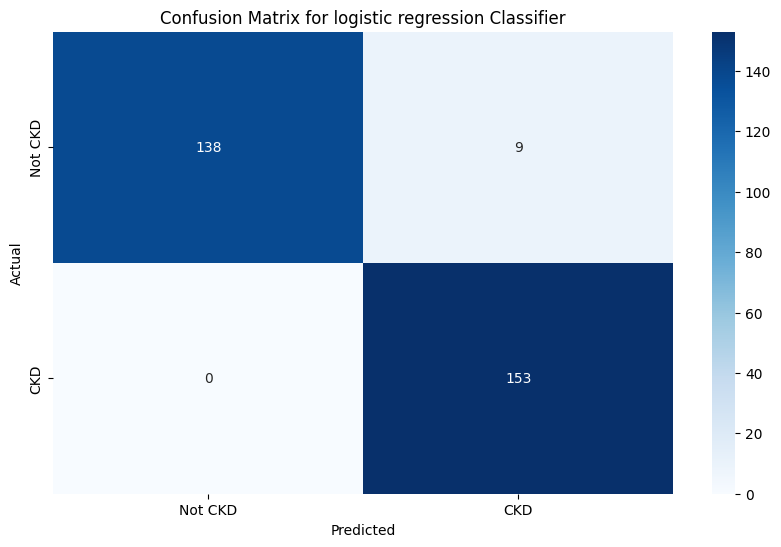

In [112]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_s, y_pred_log), annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.title('Confusion Matrix for logistic regression Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()